In [29]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [30]:
class CovidTimeSeries(object):
    """ Stores the JHU time series data for a county for covid """
    def __init__(self):
        self.regionCode= None
        self.regionName=None
        self.positive=None  #Infected used by the paper
        self.Lat=None 
        self.Long=None
        self.Combined_Key=None #unused
        self.healed=None   #Recovered
        self.totalCases=None
        self.tested = None
        self.deaths=None 

class CovidDatabase(object):
    """ Stores the covid-19 data"""
    def __init__(self):
        self.CovidData={}
        self.DateRange=[]
      
    def loadTimeSeries(self, filenameI, startdate, enddate):
        """ load the infections data from filenameI and death data from filenameD
            from startdate to enddate
        """
        csvfile=open(filenameI, newline='')
        rd = csv.reader(csvfile, delimiter=',')
        data=[]
        for lv in rd:
                data.append(lv)

        header=data[0]
        
        infectionData=(data[1:])
        temp = np.array(infectionData)
        dates = temp[:,0]
        dates = dates.tolist()


        startdate_index=dates.index(startdate)
        enddate_index=dates.index(enddate)
       

        CountyD={}
        N=len(infectionData);
        for i in range(N):
            if not startdate<= infectionData[i][0] <= enddate:
                continue
            if int(float(infectionData[i][2])) not in CountyD: #if key not already initialized
            
                c1=CovidTimeSeries()
                c1.regionCode = infectionData[i][2]
                c1.regionName = infectionData[i][3]
                c1.Lat = float(infectionData[i][4])
                c1.Long = float(infectionData[i][5])
                dRange = enddate_index - startdate_index + 1
                fp=infectionData[i][2]
                x=int(float(fp))
                c1.deaths = [float(infectionData[i][14])]
                c1.positive = [float(infectionData[i][10])]
                c1.totalCases = [float(infectionData[i][17])]
                c1.healed = [float(infectionData[i][13])]
                if(infectionData[i][19] == ''):
                    c1.tested = [float('0')]
                else:
                    c1.tested = [float(infectionData[i][19])]
                CountyD[x]=c1
            else: #if key already initialized
                fp=infectionData[i][2]
                x=int(float(fp))
                CountyD[x].positive.append(float(infectionData[i][10]))
                CountyD[x].deaths.append(float(infectionData[i][14]))
                CountyD[x].totalCases.append(float(infectionData[i][17]))
                CountyD[x].healed.append(float(infectionData[i][13]))
                if(infectionData[i][19] == ''):
                    CountyD[x].tested.append(float('0'))
                else:
                    CountyD[x].tested.append(float(infectionData[i][19]))
              
        for key in CountyD: #Turn the lists into arrays
            CountyD[key].deaths = np.array(CountyD[key].deaths)
            CountyD[key].positive = np.array(CountyD[key].positive)
            CountyD[key].healed = np.array(CountyD[key].healed)
            CountyD[key].totalCases = np.array(CountyD[key].totalCases)
            CountyD[key].tested = np.array(CountyD[key].tested)
             
        self.DateRange=dates
        self.CovidData=CountyD
        

In [31]:
# Modify the path syntax based on the current platform
if platform.system() == "Windows":
    pathc="..\\Data\\"
elif platform.system() == "Linux":
    pathc="../Data/"

fullDataName="dpc-covid19-ita-regioni.csv"

startdate='2020-04-01T17:00:00'
enddate='2021-05-18T17:00:00'

database=CovidDatabase();
database.loadTimeSeries(pathc+fullDataName, startdate, enddate)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 1914: character maps to <undefined>

# Graphing Longitute and Latitude of the Counties

13 Abruzzo
17 Basilicata
18 Calabria
15 Campania
8 Emilia-Romagna
6 Friuli Venezia Giulia
12 Lazio
7 Liguria
3 Lombardia
11 Marche
14 Molise
21 P.A. Bolzano
22 P.A. Trento
1 Piemonte
16 Puglia
20 Sardegna
19 Sicilia
9 Toscana
10 Umbria
2 Valle d'Aosta
5 Veneto


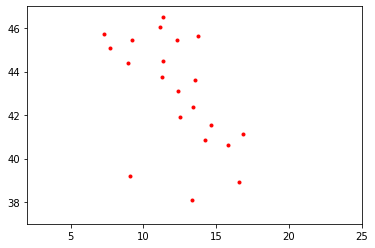

In [20]:
fig, ax=plt.subplots(figsize=(6,4))
CountyD=database.CovidData
for key in CountyD:
    lg=CountyD[key].Long
    lt=CountyD[key].Lat
    ax.plot(lg, lt, 'r.');
    ax.axis([2,25, 37,47])
    print(key, CountyD[key].regionName)

# Raw Infected and Recovered Data

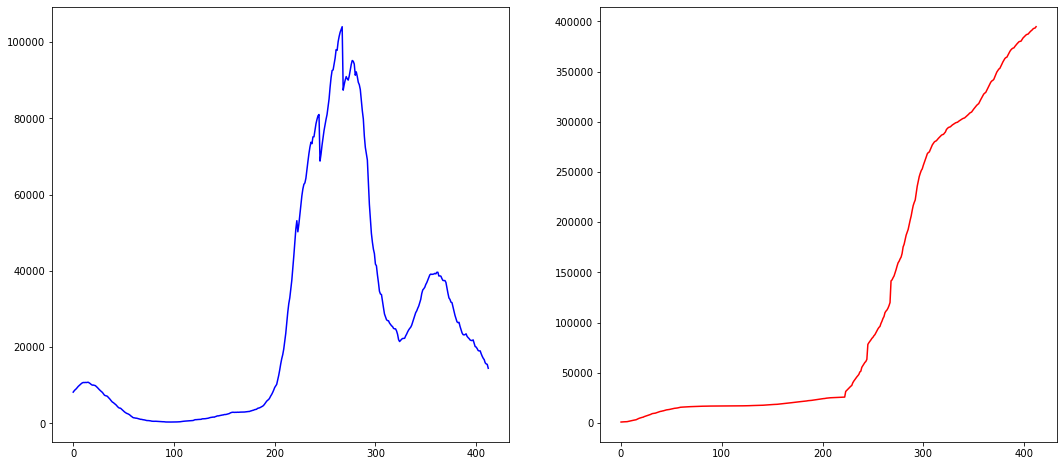

In [5]:
k1 = 5 #Veneto
d1 = database.CovidData[k1].positive
i1=database.CovidData[k1].healed

fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(d1, color='blue', label='infections')
ax2[1].plot(i1, color='red', label='recovered')

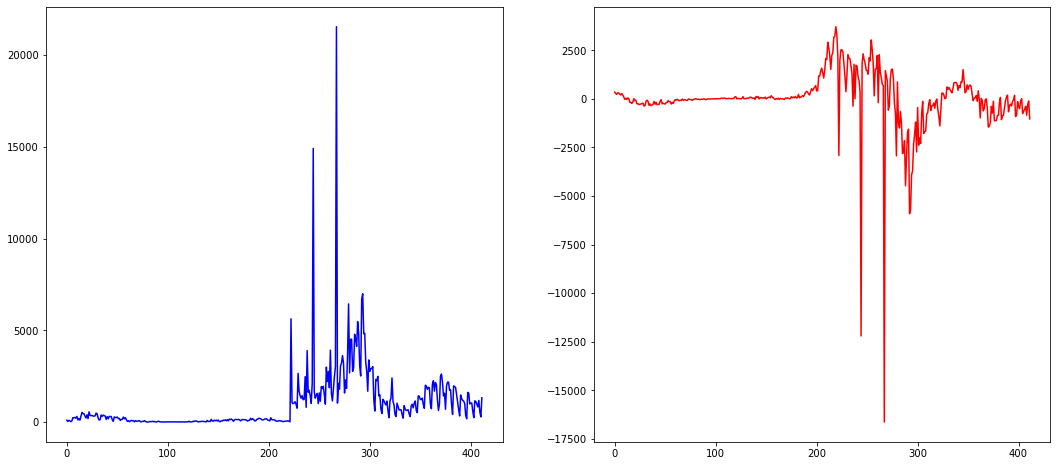

In [6]:
ri1=np.diff(i1)
rd1=np.diff(d1)
fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(ri1, color='blue', label='infections')
ax2[1].plot(rd1, color='red', label='deaths')

# Smoothing Kernel

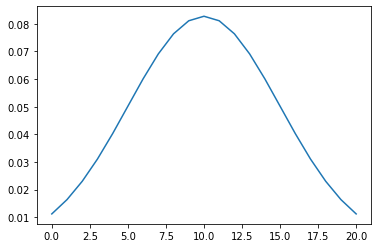

In [7]:
sigma = 5
conSize = 10
x2 = np.arange(-conSize, 1 + conSize)
kernel2 = np.exp(-(x2) ** 2 / (2 * sigma ** 2))
kernel2=kernel2/sum(kernel2)
plt.plot(kernel2)

# Raw Data

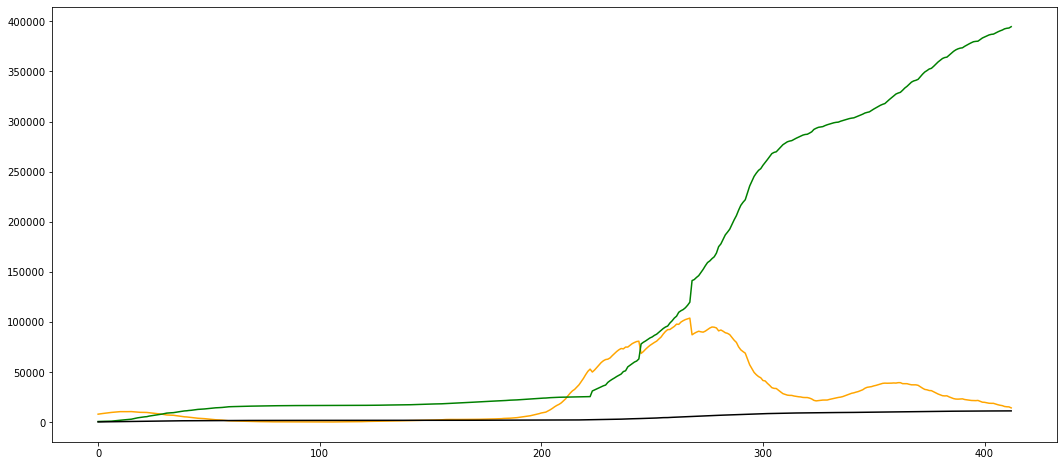

In [8]:
popITA = 60000000 #Very rought estimate just for exerimentation, assume population of italy is 60 million
infectRaw = database.CovidData[k1].positive
recovRaw = database.CovidData[k1].healed
deadRaw = database.CovidData[k1].deaths
susceptRaw = popITA - infectRaw - recovRaw - deadRaw #S + I + R + D = totalPop

fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(infectRaw, color='orange', label='infected')
ax.plot(recovRaw, color='green', label='recovered')
ax.plot(deadRaw, color='black', label='dead')

# Smoothed Data

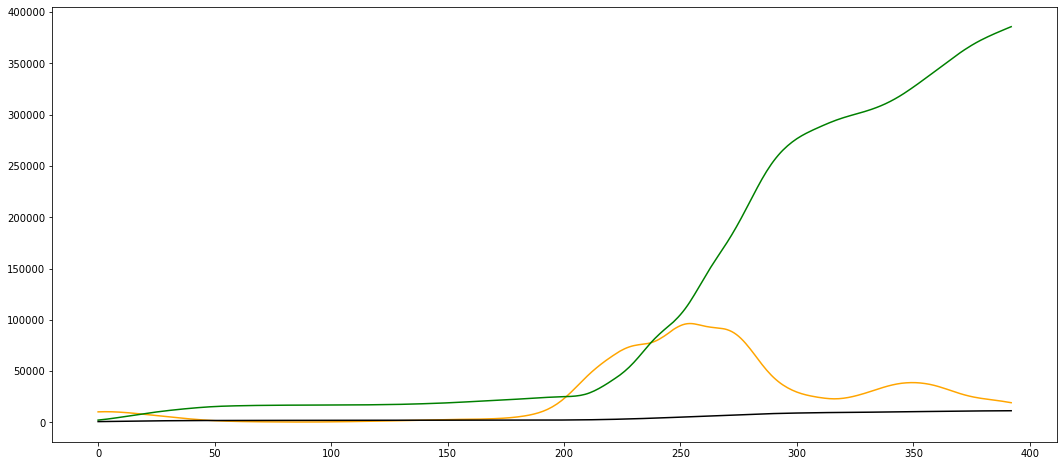

In [9]:
#option for use of raw numbers for data, no smoothing
#infect = infectRaw
#recov = recovRaw
#dead = deadRaw
#suscept = susceptRaw

#convolve the data to smooth out, valid mode keeps bound points realistic
infect = np.convolve(infectRaw, kernel2, 'valid')
recov = np.convolve(recovRaw, kernel2, 'valid')
dead = np.convolve(deadRaw, kernel2, 'valid')
suscept = popITA - infect - recov - dead #S + I + R + D = totalPop

fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(infect, color='orange', label='infected')
ax.plot(recov, color='green', label='recovered')
ax.plot(dead, color='black', label='dead')

### Modeling $\gamma$ (recovery rate), $\beta$ (transmission rate), and $\upsilon$ (death rate).

$S(t+1) = -\beta S(t)I(t) + S(t)$

$I(t+1) = \beta S(t)I(t) - \gamma I(t) - \upsilon I(t) + I(t)$

$R(t+1) = \gamma I(t) + R(t)$

$D(t+1) = \upsilon I(t) + D(t)$

### As a matrix

$\begin{bmatrix}
S(t+1) \\ I(t+1) \\ R(t+1) \\ D(t+1)
\end{bmatrix}
=
\begin{bmatrix}
S(t) & -S(t)I(t) & 0 & 0 \\
I(t) & S(t)I(t) & -I(t) & -I(t) \\
R(t) & 0 & I(t) & 0 \\
D(t) & 0 & 0 & I(t)
\end{bmatrix}
\begin{bmatrix}
1 \\ \beta \\ \gamma \\ \upsilon
\end{bmatrix}$

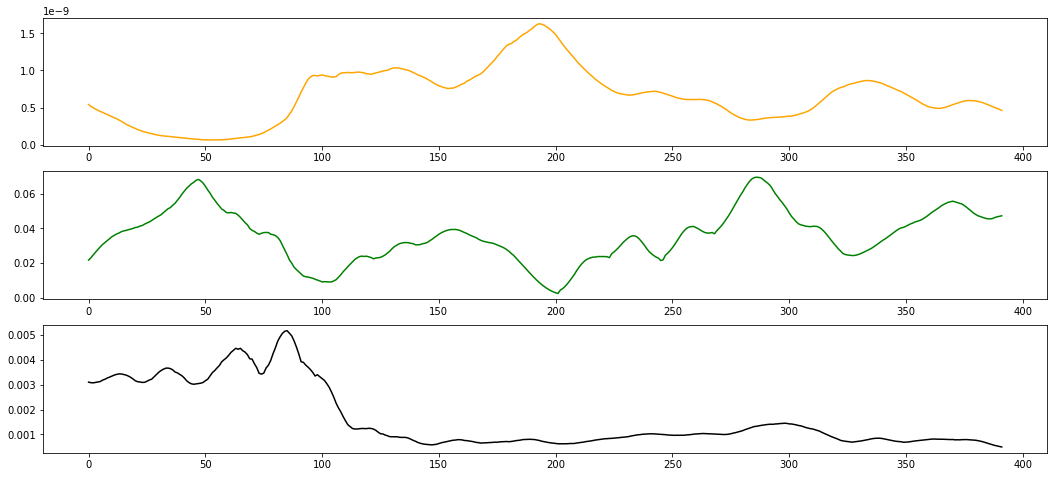

In [10]:
sirdMatrix = np.zeros((len(recov) - 1, 4, 4))
nextIterMatrix = np.zeros((len(recov) - 1, 4, 1)) #the S(t+1), I(t+1), ... matrix

#populate the 4x4 matrix with parameters (see above note)
sirdMatrix[:,0,0] = suscept[0:-1]
sirdMatrix[:,0,1] = -suscept[0:-1] * infect[0:-1]

sirdMatrix[:,1,0] = infect[0:-1]
sirdMatrix[:,1,1] = suscept[0:-1] * infect[0:-1]
sirdMatrix[:,1,2] = -infect[0:-1]
sirdMatrix[:,1,3] = -infect[0:-1]

sirdMatrix[:,2,0] = recov[0:-1]
sirdMatrix[:,2,2] = infect[0:-1]

sirdMatrix[:,3,0] = dead[0:-1]
sirdMatrix[:,3,3] = infect[0:-1]

#populate the S(t+1), I(t+1), ... matrix
nextIterMatrix[:,0,0] = suscept[1:]
nextIterMatrix[:,1,0] = infect[1:]
nextIterMatrix[:,2,0] = recov[1:]
nextIterMatrix[:,3,0] = dead[1:]

paramMatrix = np.linalg.solve(sirdMatrix, nextIterMatrix) #solve Ax = B, where A = sirdMatrix, and B = nextIterMatrix

#copy params over from the solved matrix
transRate = paramMatrix[:,1,0] #beta
recovRate = paramMatrix[:,2,0] #gamma
deathRate = paramMatrix[:,3,0] #upsilon

#plot rates over time
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(transRate, color='orange', label='Transmission Rate')
ax[1].plot(recovRate, color='green', label='Recovery Rate')
ax[2].plot(deathRate, color='black', label='Death Rate')

### An attempt at matching the results of the paper

The paper uses the first 120 days and plots the results.
The results below are very close (the recovery rate is slightly different, the paper seems to have used a lot more smoothing).

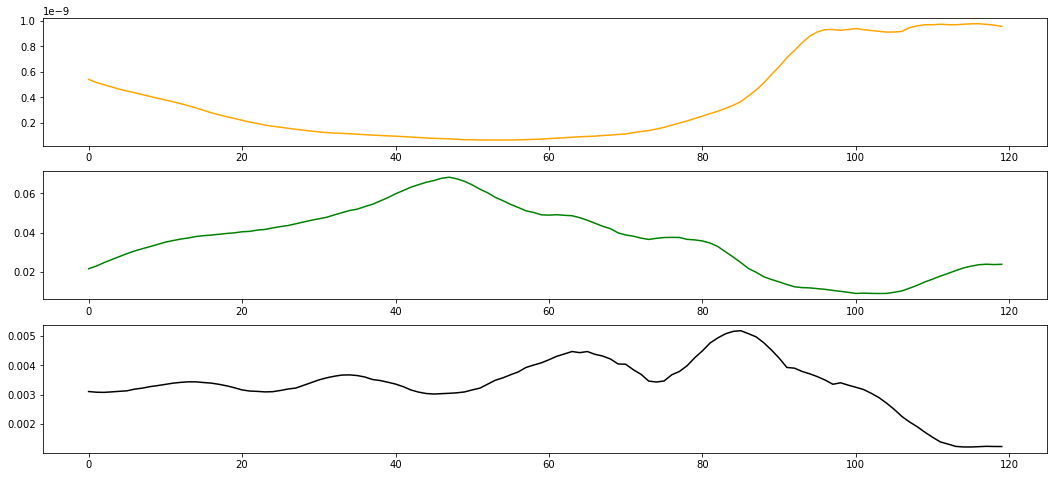

In [11]:
#graph only the first ~100-120 days (remember the first some days are removed when smoothing)
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(transRate[0:120], color='orange', label='Transmission Rate')
ax[1].plot(recovRate[0:120], color='green', label='Recovery Rate')
ax[2].plot(deathRate[0:120], color='black', label='Death Rate')

# National Data

413


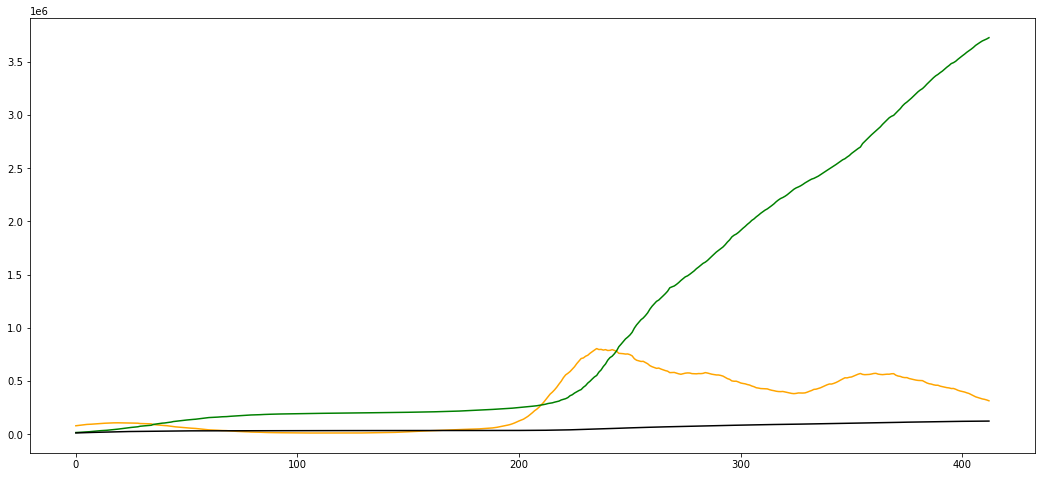

In [12]:
CountyD=database.CovidData
[N] = np.shape(CountyD[13].positive)
print(N)
natInfected = [0] * N
natRecovered = [0] * N
natDeaths = [0] * N
natTested = [0] * N
for key in CountyD:
    natInfected += CountyD[key].positive
    natRecovered += CountyD[key].healed
    natDeaths += CountyD[key].deaths
    natTested += CountyD[key].tested
popITA = 60000000
susceptRaw = popITA - natInfected - natRecovered - natDeaths
fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
#ax.plot(natTested, color = 'red', label = 'tested') #graphing tested makes the scaling hard to visualize
ax.plot(natInfected, color='orange', label='infected')
ax.plot(natRecovered, color='green', label='recovered')
ax.plot(natDeaths, color='black', label='dead')

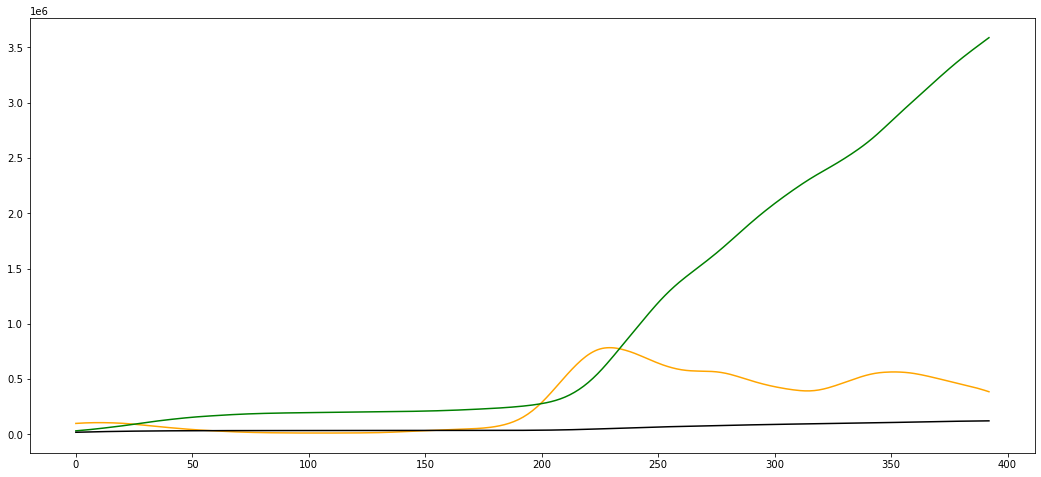

In [13]:
#convolve the data to smooth out, valid mode keeps bound points realistic
sigma = 5
conSize = 10
x2 = np.arange(-conSize, 1 + conSize)
kernel2 = np.exp(-(x2) ** 2 / (2 * sigma ** 2))
kernel2=kernel2/sum(kernel2)
infect = np.convolve(natInfected, kernel2, 'valid')
recov = np.convolve(natRecovered, kernel2, 'valid')
dead = np.convolve(natDeaths, kernel2, 'valid')
suscept = popITA - infect - recov - dead #S + I + R + D = totalPop

fig, ax = plt.subplots(figsize=(18,8))
#ax.plot(suscept, color='blue', label='suscpetible') #graphing susceptible makes the scaling to hard to visualize
ax.plot(infect, color='orange', label='infected')
ax.plot(recov, color='green', label='recovered')
ax.plot(dead, color='black', label='dead')

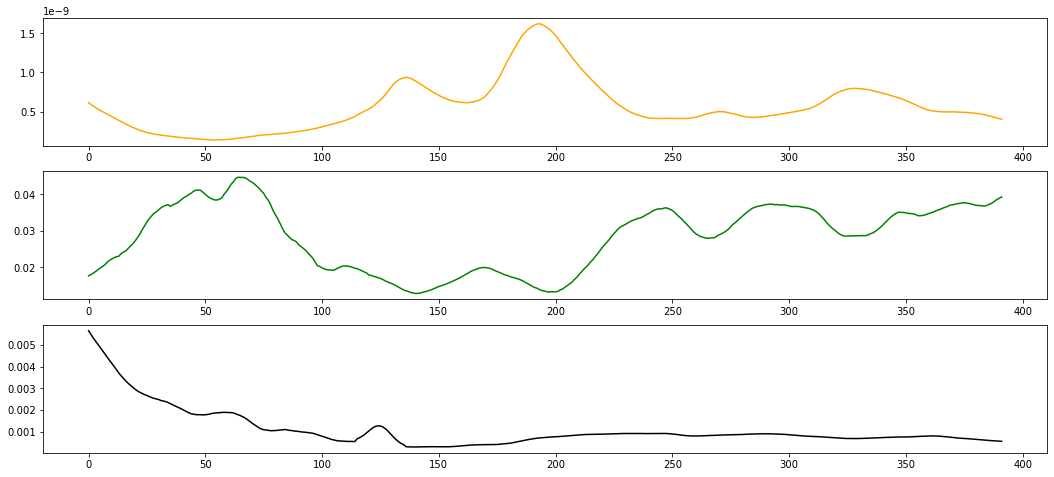

In [14]:
sirdMatrix = np.zeros((len(recov) - 1, 4, 4))
nextIterMatrix = np.zeros((len(recov) - 1, 4, 1)) #the S(t+1), I(t+1), ... matrix

#populate the 4x4 matrix with parameters (see above note)
sirdMatrix[:,0,0] = suscept[0:-1]
sirdMatrix[:,0,1] = -suscept[0:-1] * infect[0:-1]

sirdMatrix[:,1,0] = infect[0:-1]
sirdMatrix[:,1,1] = suscept[0:-1] * infect[0:-1]
sirdMatrix[:,1,2] = -infect[0:-1]
sirdMatrix[:,1,3] = -infect[0:-1]

sirdMatrix[:,2,0] = recov[0:-1]
sirdMatrix[:,2,2] = infect[0:-1]

sirdMatrix[:,3,0] = dead[0:-1]
sirdMatrix[:,3,3] = infect[0:-1]

#populate the S(t+1), I(t+1), ... matrix
nextIterMatrix[:,0,0] = suscept[1:]
nextIterMatrix[:,1,0] = infect[1:]
nextIterMatrix[:,2,0] = recov[1:]
nextIterMatrix[:,3,0] = dead[1:]

paramMatrix = np.linalg.solve(sirdMatrix, nextIterMatrix) #solve Ax = B, where A = sirdMatrix, and B = nextIterMatrix

#copy params over from the solved matrix
transRate = paramMatrix[:,1,0] #beta
recovRate = paramMatrix[:,2,0] #gamma
deathRate = paramMatrix[:,3,0] #upsilon

#plot rates over time
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(transRate, color='orange', label='Transmission Rate')
ax[1].plot(recovRate, color='green', label='Recovery Rate')
ax[2].plot(deathRate, color='black', label='Death Rate')

# Total Tested Cases

[      0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.  161231.  163757.  167129.  171735.  177154.  181473.
  186426.  183513.  192751.  196864.  200737.  206347.  212706.  216997.
  220598.  223968.  227579.  231469.  236281.  240535.  244930.  247617.
  250175.  253374.  257017.  260706.  264091.  269003.  272938.  275851.
  280629.  285786.  290682.  295343.  300799.  304944.  308128.  312632.
  317690.  323097.  326795.  331390.  333834.  335650.  340051.  341333.
  344495.  346872.  351519.  354338.  355368.  358948.  362400.  364110.
  367579.  368659.  371726.  373057.  376001.  379280.  382042.  384389.
  387501.  388938.  390386.  392124.  394533.  397538.  398960.  403556.
  405126.  406042.  408628.  411837.  415828.  417996.  421242.  422585.
  423183.  425762.  428743.  431327.  433661.  437321.  438873.  440190.
  442646.  445120.  447878.  451085.  454065.  4559

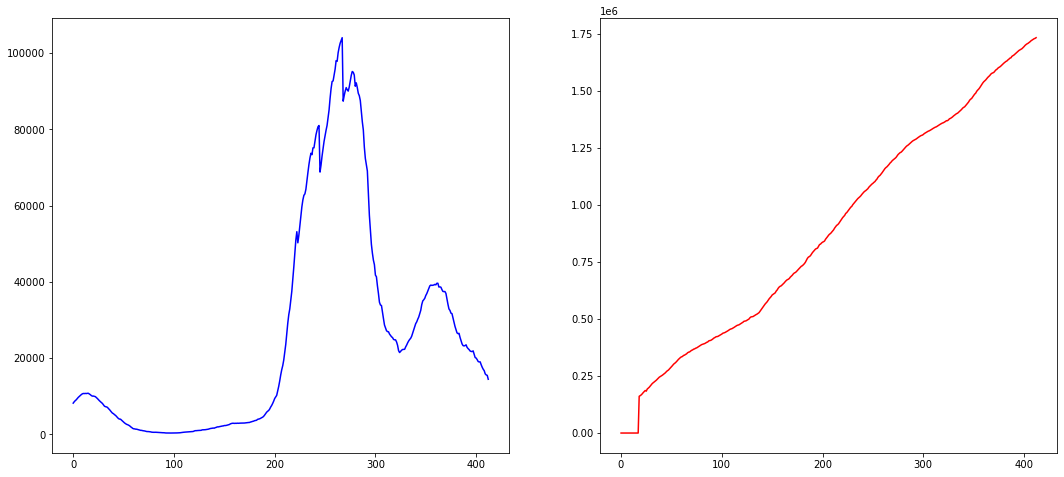

In [25]:
k1 = 5 #Veneto
d1 = database.CovidData[k1].positive
i1= database.CovidData[k1].tested
print(i1)
fig2, ax2=plt.subplots(1, 2, figsize=(18,8))
ax2[0].plot(d1, color='blue', label='infections')
ax2[1].plot(i1, color='red', label='recovered')